# 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
def log_income_sim(n):
    
    """
    Requires a simulation profile, n, structured as a dictionary
    
    n = {
        'inc0'           : 80000,      #starting income
        'g'              : 0.03,       #growth rate
        'rho'            : 0.2,        #persistence
        'st_year'        : int(2019),  #start year
        'working_years'  : 40,         #years to work
        'mu'             : 0,          #mean of the normal error
        'sigma'          : 0.1,        #standard deviation
        'num_draws'      : 10000       #simulations
    }
    """    

    #set random seed
    np.random.seed(666)

    normal_errors = np.random.normal(n['mu'], n['sigma'], (n['working_years'], n['num_draws']))

    #create a matrix of dim (lf_years, num_draws)
    ln_income_mat = np.zeros((n['working_years'], n['num_draws']))

    #fill the matrix
    ln_income_mat[0, :] = np.log(n['inc0']) + normal_errors[0, :]

    #loop and apply model
    for yr in range(1, n['working_years']):
        ln_income_mat[yr, :] = ((1 - n['rho']) * (np.log(n['inc0']) + n['g'] * (yr)) +
                                n['rho'] * ln_income_mat[yr - 1, :]
                                                 + normal_errors[yr, :])


    income_mat = np.exp(ln_income_mat) #dealing with large numbers so put in terms of 10k's
    return income_mat

Text(0,0.5,'Annual Income (\\$s)')

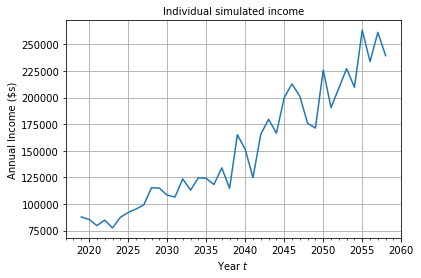

In [3]:
simulation_profile = {
    'inc0'          : 80000,
    'g'             : 0.03,
    'rho'           : 0.2,
    'st_year'       : int(2019),
    'working_years' : 40,
    'mu'            : 0, 
    'sigma'         : 0.1,
    'num_draws'     : 10000
}

inc_mat = log_income_sim(simulation_profile)
    
%matplotlib inline
n = simulation_profile
year_vec = np.arange(n['st_year'], n['st_year'] + n['working_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income (\$s)')

# 2. 

Text(0,0.5,'Frequency')

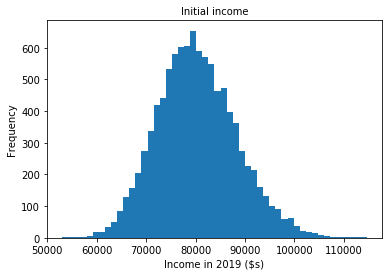

In [4]:
plt.hist(inc_mat[0], bins = 50)
plt.title('Initial income', fontsize = 10)
plt.xlabel(r'Income in 2019 (\$s)')
plt.ylabel(r'Frequency')


In [5]:
a = inc_mat[0]
percentage_greater_than_100000 = len(a[a > 100000]) / len(inc_mat[0])
percentage_smaller_than_70000 = len(a[a < 70000]) / len(inc_mat[0])
print(percentage_greater_than_100000, percentage_smaller_than_70000)

0.0114 0.0919


1.14% earn more than 100000, 9.19% earn less than 70000. It is not normal. It's slightly right skewed.\

# 3.

a[0]/a[1]

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.74400000e+03,   0.00000000e+00,   0.00000000e+00,
          8.04300000e+03,   0.00000000e+00,   0.00000000e+00,
          2.12000000e+02]),
 array([  9. ,   9.3,   9.6,   9.9,  10.2,  10.5,  10.8,  11.1,  11.4,
         11.7,  12. ]),
 <a list of 10 Patch objects>)

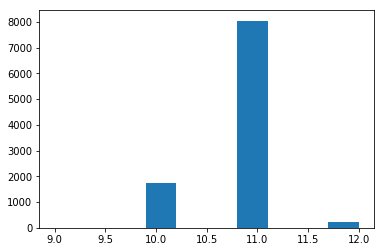

In [6]:
pays_mat = np.zeros(inc_mat.shape)
pays_mat = inc_mat * 0.1
debt = 95000
debts_paid = np.zeros(inc_mat.shape)
for yr in range(0, 40):
    debts_paid[yr, :] = debt - pays_mat[yr, :]
    debt = debt - pays_mat[yr, :]
list_debts = list(zip(*debts_paid))
list_years = []
for person in list_debts:
    num_yrs = 1
    for yr in person:
        if yr > 0:
            num_yrs += 1
    list_years.append(num_yrs)
plt.hist(list_years)
            

In [7]:
in_ten_years = 0.0
for sim in list_years:
    if sim <= 10:
        in_ten_years += 1.0
percent_sim = in_ten_years / len(list_years)
print(percent_sim)

0.1745


In 17.45% of simulation. \

# 4.

Text(0,0.5,'Annual Income (\\$s)')

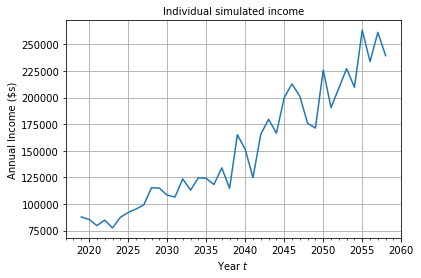

In [12]:
simulation_profile2 = {
    'inc0'          : 85000,
    'g'             : 0.03,
    'rho'           : 0.2,
    'st_year'       : int(2019),
    'working_years' : 40,
    'mu'            : 0, 
    'sigma'         : 0.15,
    'num_draws'     : 10000
}

inc_mat2 = log_income_sim(simulation_profile2)
    
%matplotlib inline
n = simulation_profile2
year_vec = np.arange(n['st_year'], n['st_year'] + n['working_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income (\$s)')

(array([  3.00000000e+00,   0.00000000e+00,   6.87000000e+02,
          0.00000000e+00,   0.00000000e+00,   6.35000000e+03,
          0.00000000e+00,   2.90600000e+03,   0.00000000e+00,
          5.40000000e+01]),
 array([  8. ,   8.4,   8.8,   9.2,   9.6,  10. ,  10.4,  10.8,  11.2,
         11.6,  12. ]),
 <a list of 10 Patch objects>)

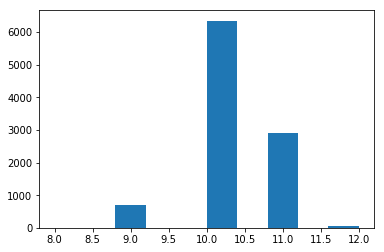

In [13]:
pays_mat2 = np.zeros(inc_mat2.shape)
pays_mat2 = inc_mat2 * 0.1
debt2 = 95000
debts_paid2 = np.zeros(inc_mat2.shape)
for yr in range(0, 40):
    debts_paid2[yr, :] = debt2 - pays_mat2[yr, :]
    debt2 = debt2 - pays_mat2[yr, :]
list_debts2 = list(zip(*debts_paid2))
list_years2 = []
for person in list_debts2:
    num_yrs = 1
    for yr in person:
        if yr > 0:
            num_yrs += 1
    list_years2.append(num_yrs)
plt.hist(list_years2)
            

In [14]:
in_ten_years2 = 0.0
for sim in list_years2:
    if sim <= 10:
        in_ten_years2 += 1.0
percent_sim = in_ten_years2 / len(list_years2)
print(percent_sim)

0.704


In 70.4% of simulations. \